In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [18]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment
from wm.moments import PseudoZernikeMoment

In [19]:
w = np.random.randint(2, size=8)

## RHFM

In [20]:
N = 64
order = 32
im = Image('lena_'+str(N)+'.png')
RHFM = RadialHarmonicFourierMoment(order, N)

In [21]:
%%time
E = RHFM.encode(im.grey, w, verbose=True)

CPU times: user 729 ms, sys: 21.1 ms, total: 750 ms
Wall time: 706 ms


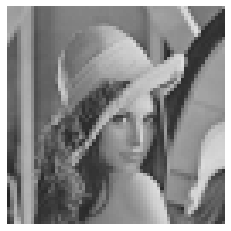

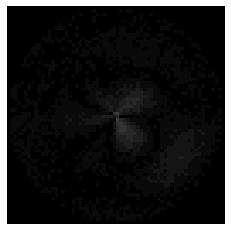

In [22]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [24]:
%%time
w2 = RHFM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 1 1 1 0 0 0]                   
[0 1 1 1 1 0 0 0]
CPU times: user 137 ms, sys: 9.82 ms, total: 147 ms
Wall time: 126 ms


## ZM

In [25]:
N = 64
order = 16
im = Image('lena_'+str(N)+'.png')
ZM = ZernikeMoment(order, N)

In [26]:
%%time
E = ZM.encode(im.grey, w, verbose=True)

CPU times: user 2.52 s, sys: 20.2 ms, total: 2.54 s
Wall time: 2.46 s


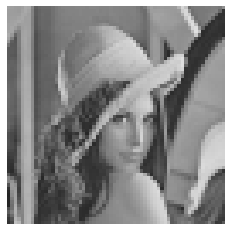

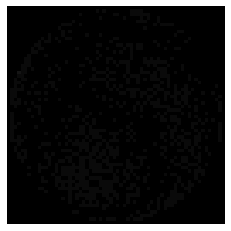

In [27]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [29]:
%%time
w2 = ZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 1 1 1 0 0 0]                   
[0 1 1 1 1 0 0 0]
CPU times: user 1.35 s, sys: 0 ns, total: 1.35 s
Wall time: 1.31 s


## PZM

In [13]:
N = 64
order = 16
im = Image('lena_'+str(N)+'.png')
PZM = PseudoZernikeMoment(order, N)

In [14]:
%%time
E = PZM.encode(im.grey, w, verbose=True)

CPU times: user 2.62 s, sys: 49.1 ms, total: 2.67 s
Wall time: 2.6 s


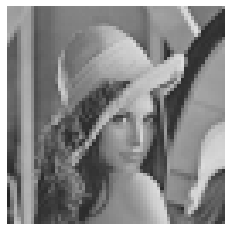

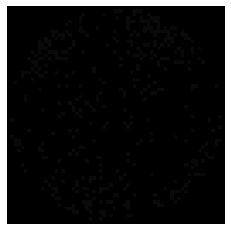

In [15]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [17]:
%%time
w2 = PZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[1 1 1 0 0 1 0 1]                   
[1 1 1 0 0 1 0 1]
CPU times: user 1.44 s, sys: 30 ms, total: 1.47 s
Wall time: 1.43 s
